# Go to test folder and load necessary packages

In [1]:
cd("/Users/mmorligh/Desktop/issmuci/trunk-jpl/src/dJUICE/test")
include("../src/dJuice.jl")
using .dJUICE

# Load ISSM model structure previously saved in MATLAB

In [2]:
using MAT
file = matopen("../data/temp12k.mat");
mat  = read(file, "md")
close(file)
md = model(mat, false);
println("Mesh total number of elements: ",md.mesh.numberofelements);

Mesh total number of elements: 12131


┌ Warning: MATLAB bamggeom values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB bamgmesh values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB qmustatistics values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB lovenumbers values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB rotational values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB solidearthsettings values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167


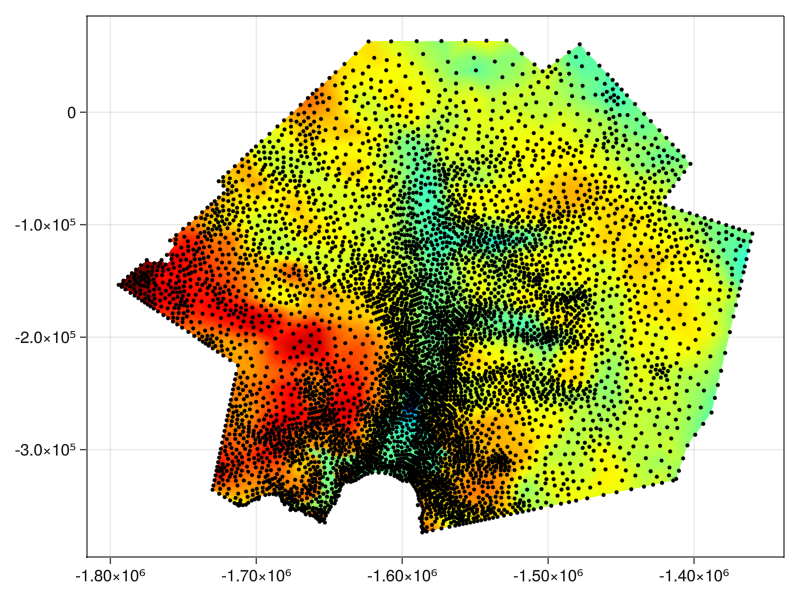

In [3]:
#Load plotting functions
include("../src/usr/plotmodel.jl")

#plot bed (show node location, hide edges)
plotmodel(md, md.geometry.bed, true, false)

# Solve for stress balance and plot computed ice flow velocity

   creating datasets for analysis Main.dJUICE.StressbalanceAnalysis
      detecting active vertices
   computing stress balance
   Renumbering degrees of freedom
   checking convergence
   mechanical equilibrium convergence criterion 78.54450100139434 > 1.0 %
   Convergence criterion: norm(du)/norm(u)      14.840855310844429 > 10.0 %
   checking convergence
   mechanical equilibrium convergence criterion 14.71457125091003 > 1.0 %
   Convergence criterion: norm(du)/norm(u)      5.015488012424872 < 10.0 %
   checking convergence
   mechanical equilibrium convergence criterion 6.392389515553722 > 1.0 %
   Convergence criterion: norm(du)/norm(u)      3.048041983166721 < 10.0 %
   checking convergence
   mechanical equilibrium convergence criterion 3.2064949461514196 > 1.0 %
   Convergence criterion: norm(du)/norm(u)      1.9863828726752397 < 10.0 %
   checking convergence
   mechanical equilibrium convergence criterion 1.7136888844092855 > 1.0 %
   Convergence criterion: norm(du)/norm(u)  

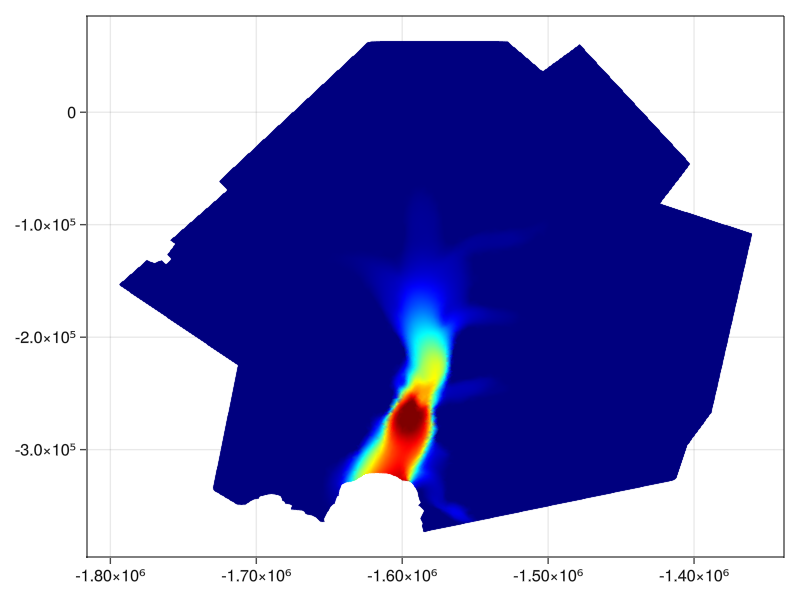

In [4]:
@time md=solve(md,"Stressbalance")

plotmodel(md,md.results["StressbalanceSolution"]["Vel"], false, false)

# Prepare smaller domain to test Enzyme

In [6]:
file = matopen("../data/temp.mat");
mat  = read(file, "md")
close(file)
md = model(mat, false);
println("Mesh total number of elements: ",md.mesh.numberofelements);

Mesh total number of elements: 35


┌ Warning: MATLAB qmustatistics values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB lovenumbers values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB rotational values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167
┌ Warning: MATLAB solidearthsettings values are currently not supported
└ @ MAT.MAT_HDF5 /Users/mmorligh/.julia/packages/MAT/zayWb/src/MAT_HDF5.jl:167


In [7]:
@time md=solve(md,"Stressbalance");

   creating datasets for analysis Main.dJUICE.StressbalanceAnalysis
      detecting active vertices
   computing stress balance
   Renumbering degrees of freedom
   checking convergence
   mechanical equilibrium convergence criterion 213.77336832795578 > 5.0 %
   Convergence criterion: norm(du)/norm(u)      59.799679570883015 < 100.0 %
   checking convergence
   mechanical equilibrium convergence criterion 10.540893772911204 > 5.0 %
   Convergence criterion: norm(du)/norm(u)      7.507661159548739 < 100.0 %
   checking convergence
   mechanical equilibrium convergence criterion 1.2608483523023415 < 5.0 %
   Convergence criterion: norm(du)/norm(u)      1.7191938277187353 < 100.0 %

   total number of iterations: 3
 17.791170 seconds (27.60 M allocations: 1.463 GiB, 3.32% gc time, 99.98% compilation time)


# Define cost function

In [8]:
function cost(md::model, friction::Vector{Float64})
    
    #Solve stress balance
    md = solve(md, "Stressbalance")
    
    #return misfit to observations
    vel_data  = sqrt.(md.inversion.vx_obs.^2 + md.inversion.vy_obs.^2)
    vel_model = md.results["StressbalanceSolution"]["Vel"]
    return sum(sqrt.((vel_data - vel_model).^2))
end

cost (generic function with 1 method)

In [9]:
#Test cost function (run at least once to compile)
@time println("\n\nInitial cost function is J = ", cost(md, md.friction.coefficient), " m/yr")

   creating datasets for analysis Main.dJUICE.StressbalanceAnalysis
      detecting active vertices
   computing stress balance
   Renumbering degrees of freedom
   checking convergence
   mechanical equilibrium convergence criterion 213.77336832795578 > 5.0 %
   Convergence criterion: norm(du)/norm(u)      59.799679570883015 < 100.0 %
   checking convergence
   mechanical equilibrium convergence criterion 10.540893772911204 > 5.0 %
   Convergence criterion: norm(du)/norm(u)      7.507661159548739 < 100.0 %
   checking convergence
   mechanical equilibrium convergence criterion 1.2608483523023415 < 5.0 %
   Convergence criterion: norm(du)/norm(u)      1.7191938277187353 < 100.0 %

   total number of iterations: 3


Initial cost function is J = 13687.8306131679 m/yr
  0.259177 seconds (884.88 k allocations: 53.244 MiB, 98.81% compilation time)


# Run Enzyme to optimize friction coefficients

In [ ]:
using Enzyme

#make model run faster
md.stressbalance.maxiter = 1

#define control
α = md.friction.coefficient

#initialize derivative as 0
∂J_∂α = zero(α)

#Call enzyme to get derivative of cost function
Enzyme.API.looseTypeAnalysis!(true)
Enzyme.API.strictAliasing!(false)
@time autodiff(cost, Active, md, Duplicated(α, ∂J_∂α))